# Задание 1

In [ ]:
import numpy as np
from scipy.stats import f, norm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Исходные данные
Даны две независимые выборки:
- $X_1 \sim \mathcal{N}(\mu_1, \sigma_1^2)$, где $\mu_1=0, \sigma_1^2=2$
- $X_2 \sim \mathcal{N}(\mu_2, \sigma_2^2)$, где $\mu_2=0, \sigma_2^2=1$

Известны $\mu_1, \mu_2$, поэтому можно использовать точные выражения для сумм квадратов отклонений.

### Необходимые определения:

>**Распределение $\chi^2$**<br/>
Пусть есть совокупность случайных независимых стандартных нормальных величин
$X_1,...,X_n \sim \mathcal{N}(0, 1)$. Тогда сумма квадратов этих величин будет иметь распределение $\chi^2$ с $n$ степенями свободы:
$$X=\sum\limits_{i=1}^n X^2_i \sim \chi^2n$$

>**Распределение Стьюдента $t$**<br/>
Пусть $X_0, \dots, X_n \sim \mathcal{N}(0, 1)$. Тогда величина
$$
t = \frac{X_0}{\sqrt{\frac{1}{n} \sum\limits_{i=1}^{n} X_i^2}}
$$
имеет распределение Стьюдента с $n$ степенями свободы, или же $t \sim t_{n}$.

>**Распределение Фишера $F$**<br/>
Пусть $X_1, \dots, X_n \sim \mathcal{N}(0, 1)$, $Y_1, \dots, Y_m \sim \mathcal{N}(0, 1)$<br/>
  Тогда величины $Z_1 = \sum\limits_{i=1}^{n} X_i^2$ и $Z_2 = \sum\limits_{i=1}^{m} Y_i^2$ будут иметь распределения $\chi_n^2$ и $\chi_m^2$ соответственно, а величина
$$F = \frac{\frac{Z_1}{n}}{\frac{Z_2}{m}}$$
будет иметь распределение Фишера со степенями свободы $n, m$.
### Опеределение доверительного интеравала
Функция, указанная в задании, имеет распределение Фишера $F(n_1, n_2)$, так как:

1. Для нормально распределённых данных с известным средним $μ$:

$$
\frac{\sum\limits_{i=1}^{n_1} (X_{1,i}-μ_1)^2}{σ_1^2} ∼ χ^2(n_1),\quad
\frac{\sum\limits_{i=1}^{n_2} (X_{2,i}-μ_2)^2}{σ_2^2} ∼ χ^2(n_2)
$$

2. Отношение двух $χ^2$, делённых на степени свободы это распределение Фишера $F(n_1, n_2)$:

$$
\frac{\frac{\sum\limits_{i=1}^{n_1} (X_{1,i}-μ_1)^2}{σ_1^2}/n_1}{\frac{\sum\limits_{i=1}^{n_2} (X_{2,i}-μ_2)^2}{σ_2^2}/n_2} \sim F(n_1, n_2)
$$

Получаем:

$$
\frac{n_2\sum\limits_{i=1}^{n_1}(X_{1,i}-μ_1)^2}{n_1\sum\limits_{i=1}^{n_2} (X_{2,i}-μ_2)^2}\cdot \frac{σ_2^2}{σ_1^2} \sim F(n_1, n_2)
$$


Для удобства сделаем замену:

$$
S_1^2 = \frac{\sum\limits_{i=1}^{n_1} (X_{1,i}-μ_1)^2}{n_1},\quad
S_2^2 = \frac{\sum\limits_{i=1}^{n_2} (X_{2,i}-μ_1)^2}{n_2}
$$

Подставляя в выражение выше получаем:

$$
\frac{S_1^2}{S_2^2}\cdot \frac{σ_2^2}{σ_1^2} = \frac{S_1^2}{S_2^2}\cdot \frac{1}{τ} \sim F(n_1, n_2)
$$

Из распределения Фишера:

$$
P(F_{α/2}(n_1, n_2) ≤ \frac{S_1^2}{S_2^2} \frac{1}{τ} ≤ F_{1-α/2}(n_1, n_2)) = 1 - α
$$

Решаем неравенство относительно $τ:$

$$
τ \in \left[\frac{S_1^2/S_2^2}{F_{1-α/2}(n_1, n_2)},  \frac{S_1^2/S_2^2}{F_{α/2}(n_1, n_2)}\right]
$$


Вводим параметры:

In [ ]:
# Параметры
mu1, mu2 = 0, 0
sigma1_sq, sigma2_sq = 2, 1
tau_true = sigma1_sq / sigma2_sq
alpha = 0.05  # уровень значимости
n_small = 25  # малый объем выборки
n_large = 10000  # большой объем выборки
n_experiments = 1000  # количество экспериментов

Код для генерации экспериментов по количеству элементов выборки:

In [ ]:
def run_experiment1(n):
  coverages = 0  # счетчик покрытий истинного значения tau

  lowers = []
  uppers = []

  for _ in range(n_experiments):
    # Генерация выборок
    X1 = np.random.normal(mu1, np.sqrt(sigma1_sq), n)
    X2 = np.random.normal(mu2, np.sqrt(sigma2_sq), n)

    # Вычисление статистик S1^2 и S2^2
    S1_sq = np.sum((X1 - mu1)**2) / n
    S2_sq = np.sum((X2 - mu2)**2) / n

    # Оценка tau
    tau_hat = S1_sq / S2_sq

    # Квантили распределения Фишера
    F_lower = f.ppf(alpha/2, n, n)
    F_upper = f.ppf(1 - alpha/2, n, n)

    # Доверительный интервал для tau
    ci_lower = tau_hat / F_upper
    ci_upper = tau_hat / F_lower

    # Сохраняем значения для построения графика
    lowers.append(ci_lower)
    uppers.append(ci_upper)

    # Проверка покрытия
    if ci_lower <= tau_true <= ci_upper:
        coverages += 1

  combined_data = pd.DataFrame(np.vstack((lowers, uppers)).T, columns=["Нижняя граница", "Верхняя граница"])
  coverage_prob = coverages / n_experiments

  return coverage_prob, combined_data

Код для отрисовки графиков по итогу двух генераций:

In [ ]:
def draw_plots1(combined_data_small, combined_data_large):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7))
  fig.suptitle(f"Boxplot границ доверительного интервала уровня доверия {1 - alpha}")

  plot1 = sns.boxplot(combined_data_small, ax=ax1)
  plot1.hlines(tau_true, xmin = -1, xmax = 2, colors = ["Red"], label = f"Настоящее tau: {tau_true}")
  plot1.set_title(f"Для размера выборки {n_small}")
  ax1.legend()

  plot2 = sns.boxplot(combined_data_large, ax=ax2)
  plot2.hlines(tau_true, xmin = -1, xmax = 2, colors = ["Red"], label = f"Настоящее tau: {tau_true}")
  plot2.set_title(f"Для размера выборки {n_large}")
  ax2.legend()

  plt.legend()
  plt.tight_layout()
  plt.show()

Явная генерация и вычисление доверительного интервала:

Доля покрытий для n=25: 0.9520
Доля покрытий для n=10000: 0.9580


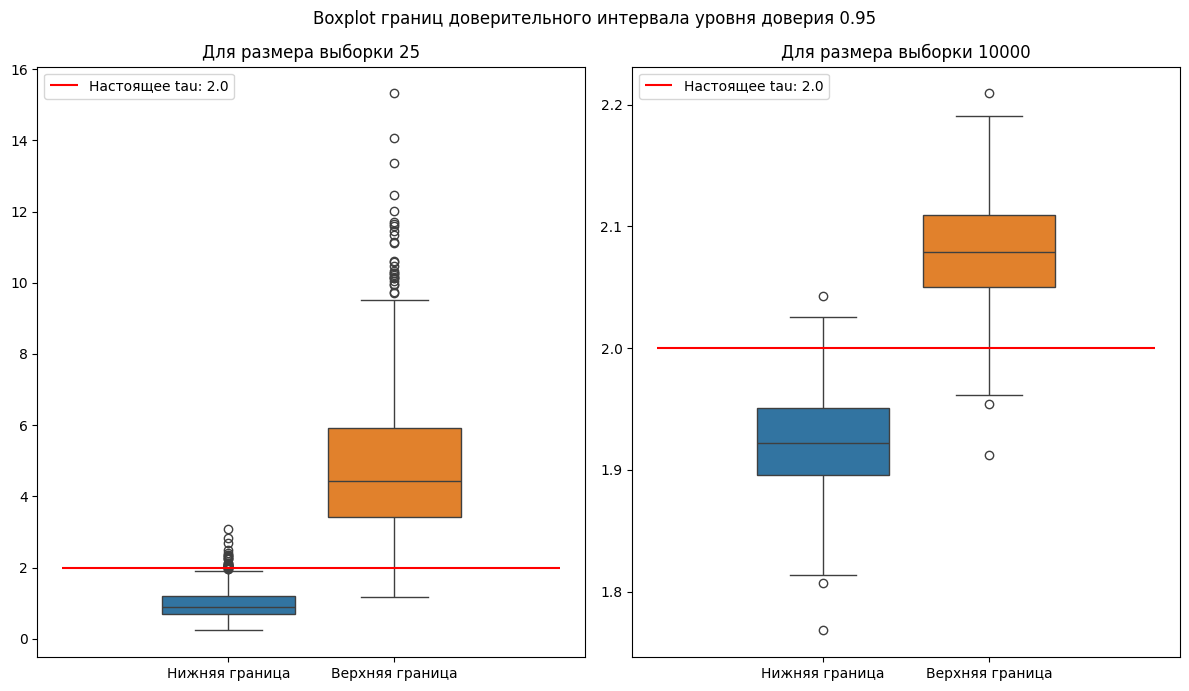

In [ ]:
coverage_small, combined_data_small = run_experiment1(n_small)
coverage_large, combined_data_large = run_experiment1(n_large)

print(f"Доля покрытий для n={n_small}: {coverage_small:.4f}")
print(f"Доля покрытий для n={n_large}: {coverage_large:.4f}")

draw_plots1(combined_data_small, combined_data_large)

С увеличением объема выборки эмпирическая доля покрытий стремится к номинальному уровню доверия (95%), а доверительные интервалы становятся уже.


# Задание 2

### Исходные данные

- Дано: распеределение $\text{Exp}(\lambda)$.

### Необходимые определения

>**Плотность $\text{Exp}(\lambda)$**:
$$
f(x; \lambda) =
\begin{cases}
\lambda e^{-\lambda x}, \quad x \geq 0\\
0, \quad x \le 0
\end{cases}
$$

>**Функция $\text{Exp}(\lambda)$**:
$$
F(x; \lambda) =
\begin{cases}
1 - e^{-\lambda x}, \quad x \geq 0\\
0, \quad x \le 0
\end{cases}
$$

>**Медиана** — это значение $m$, такое что:
$$
P(X \leq m) = 0.5.
$$

### Определение асимптотического доверительного интервала

Пусть $ X_1, X_2, \ldots, X_n $ — независимые и одинаково распределённые случайные величины с функцией плотности $f(x)$.

Обозначим через $ \hat{m} $ выборочную медиану:
$$
\hat{m} = \text{med}(X_1, X_2, \ldots, X_n)
$$
По Центральной предельной теореме, при $n\to\infty$ выборочная медиана $\hat{m}$ имеет асимптотически нормальное распределение:
$$
\sqrt{n} \left( \hat{m} - m \right) \xrightarrow{d} \mathcal{N}\left(0, \frac{1}{4f(m)^2}\right)
$$
Или, что тоже самое:

$$
2f(m)\sqrt{n}(\hat{m} - m) \xrightarrow{d} \mathcal{N}(0, 1)
$$

Тогда, используя кватили нормального рампеределения, можно записать следующее:

$$
P(-q_{1-α/2} \le 2f(m)\sqrt{n}(\hat{m} - m) \le q_{1-α/2}) \approx 1 - \alpha
$$

Откуда

$$
P\left(\hat{m}-\frac{q_{1-α/2}}{2f(m)\sqrt{n}} \le m \le \hat{m}+\frac{q_{1-α/2}}{2f(m)\sqrt{n}}\right) \approx 1 - \alpha
$$

Это позволяет построить асимптотический доверительный интервал уровня доверия $1 - \alpha:$

$$
\boxed{
m \in \left[ \hat{m}-\frac{q_{1-α/2}}{2f(m)\sqrt{n}}, \hat{m}+\frac{q_{1-α/2}}{2f(m)\sqrt{n}}\right]
}
$$

### Медиана для экспоненциального распределения

Вычислим $f(m)$ для экспоненциального распределения.

Для начала выведем теоретическое значение медианы для экспоненциального распеределения.

$$
P(X \leq m) = 1 - e^{-\lambda m} = 0.5
$$

Отсюда:

$$
e^{-\lambda m} = 0.5 \quad \Rightarrow \quad -\lambda m = \ln(0.5) \quad \Rightarrow \quad m = \frac{\ln(2)}{\lambda}
$$

Таким образом, медиана экспоненциального распределения:

$$
m = \frac{\ln(2)}{\lambda}
$$

Подставляя это значение в функцию плотности получим:

$$
f(m) = \lambda e^{-\lambda \cdot \frac{\ln(2)}{\lambda}} = \lambda e^{-\ln(2)} = \lambda \cdot \frac{1}{2} = \frac{\lambda}{2}
$$

Подствляя полученной значения $f(m)$ в ранее выведенную формулу для асимптотического доверительного интервала получим:

$$
m \in \left[ \hat{m}-\frac{q_{1-α/2}}{2\frac{\lambda}{2}\sqrt{n}}, \hat{m}+\frac{q_{1-α/2}}{2\frac{\lambda}{2}\sqrt{n}}\right]
$$

Что после простейших преобразований даёт итоговую формулу:

$$
\boxed{
m \in \left[ \hat{m}-\frac{q_{1-α/2}}{\lambda\sqrt{n}}, \hat{m}+\frac{q_{1-α/2}}{\lambda\sqrt{n}}\right]
}
$$

### Оценка параметра λ

По условию значение $\lambda$ нам неизвестно, а значит его нужно вычислить на основе выборки. Для этого можно использовать метод максимального правдоподобия.

Введём функцию правдоподобия для параметра $\lambda$:
$$
L(x, \lambda) = \prod_{i=1}^n f(x_i; \lambda) = \prod_{i=1}^n \lambda e^{-\lambda x_i}
$$

Прологарифмируем функцию правдоподобия:
$$
\ln L(x, \lambda) = \ln \left( \prod_{i=1}^n \lambda e^{-\lambda x_i} \right) = \sum_{i=1}^n \ln \left( \lambda e^{-\lambda x_i} \right)=n \ln \lambda - \lambda \sum_{i=1}^n x_i
$$

Максимизируем $ \ln L(\lambda) $. Для этого находим производную по $\lambda$ и приравниваем её к нулю:
$$
\frac{\partial}{\partial \lambda} \ln L(\lambda) = \frac{n}{\lambda} - \sum\limits_{i=1}^n x_i
$$

Приравниваем производную к нулю:
$$
\frac{n}{\hat\lambda} - \sum\limits_{i=1}^n x_i = 0
$$

Решаем относительно $ \lambda $:
$$
\hat\lambda = \frac{n}{\sum\limits_{i=1}^n x_i}
$$

Заметим, что $ \frac{1}{n} \sum\limits_{i=1}^n x_i $ — это выборочное среднее $ \bar{x} $. Поэтому:
$$
\hat\lambda = \frac{1}{\bar{x}}
$$

### Итоговая формула

Запишем наконец итоговую формулу асимптотического доверительного инетрвала для медианы экспоненциального распределения, уровня доверия $1-\lambda$
$$
\boxed{
m \in \left[ \hat{m}-\frac{q_{1-α/2}}{\hat\lambda\sqrt{n}}, \hat{m}+\frac{q_{1-α/2}}{\hat\lambda\sqrt{n}}\right]\quad\hat\lambda = \frac{1}{\bar{x}}
}
$$

Проверим покрытие интервала для
$n=25$ и $n=10000$, повторяя эксперимент 1000 раз.

Вводим параметры

In [ ]:
lambda_ = 1
m_true = np.log(2) / lambda_
q = norm.ppf(1 - alpha / 2)

Код для генерации экспериментов по количеству элементов выборки:

In [ ]:
def run_experiment2(n):
  coverages = 0
  lowers = []
  uppers = []

  for _ in range(n_experiments):
    # Генерация выборки
    X = np.random.exponential(scale = 1 / lambda_, size = n)

    # Выборочная медиана
    m_hat = np.median(X)

    # Оценка параметра lambda
    lambda_hat = 1 / np.mean(X)

    # Доверительный интервал
    ci_lower = m_hat - q / (np.sqrt(n) * lambda_hat)
    ci_upper = m_hat + q / (np.sqrt(n) * lambda_hat)

    # Сохраняем данные для построения графиков
    lowers.append(ci_lower)
    uppers.append(ci_upper)

    # Проверка покрытия
    if ci_lower <= m_true <= ci_upper:
      coverages += 1

  combined_data = pd.DataFrame(np.vstack((lowers, uppers)).T, columns=["Левая граница", "Правая граница"])
  coverage_prob = coverages / n_experiments

  return coverage_prob, combined_data

Код для отрисовки графиков по итогу двух генераций:

In [ ]:
def draw_plots2(combined_data_small, combined_data_large):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7))
  fig.suptitle(f"Boxplot границ доверительного интервала уровня доверия {1 - alpha}")

  plot1 = sns.boxplot(combined_data_small, ax=ax1)
  plot1.hlines(m_true, xmin = -1, xmax = 2, colors = ["Red"], label = f"Настоящая медиана: {m_true:.4f}")
  plot1.set_title(f"Для размера выборки {n_small}")
  ax1.legend()

  plot2 = sns.boxplot(combined_data_large, ax=ax2)
  plot2.hlines(m_true, xmin = -1, xmax = 2, colors = ["Red"], label = f"Настоящая медиана: {m_true:.4f}")
  plot2.set_title(f"Для размера выборки {n_large}")
  ax2.legend()

  plt.legend()
  plt.tight_layout()
  plt.show()

Сам эксперимент

Покрытие для n=25: 0.9450
Покрытие для n=10000: 0.9440


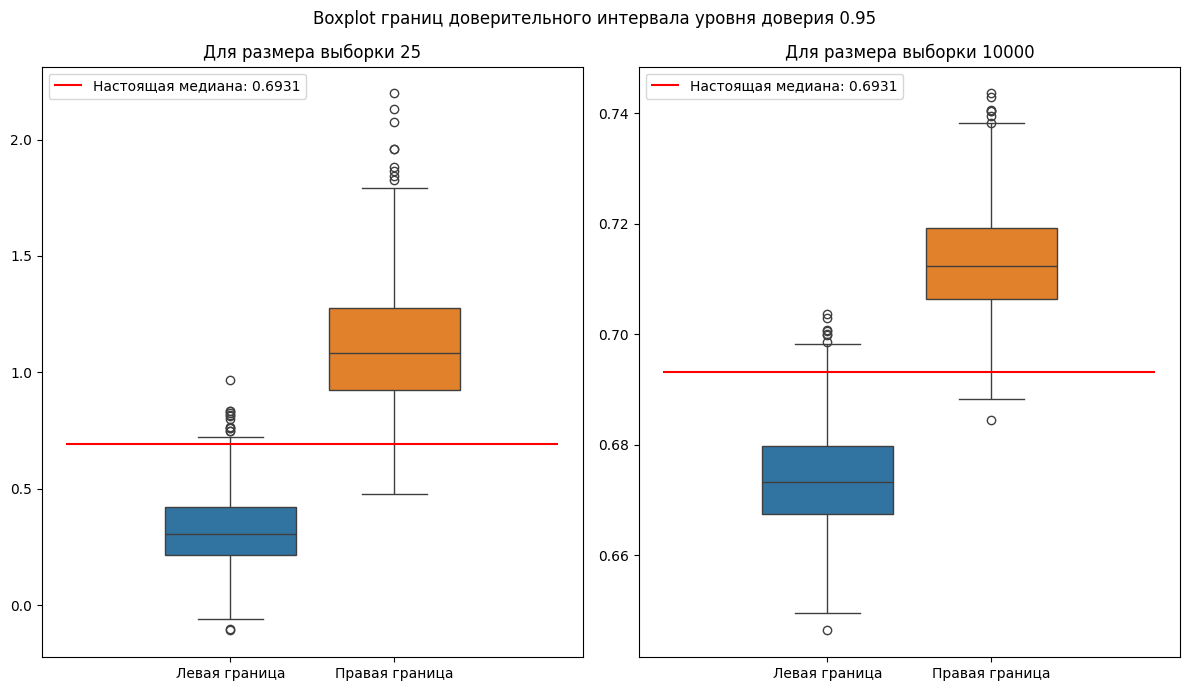

In [ ]:
coverage_small, combined_data_small = run_experiment2(n_small)
coverage_large, combined_data_large = run_experiment2(n_large)

print(f"Покрытие для n={n_small}: {coverage_small:.4f}")
print(f"Покрытие для n={n_large}: {coverage_large:.4f}")

draw_plots2(combined_data_small, combined_data_large)

Итог:

Для $n=25$: ~93-94% покрытий (из-за малого $n$ аппроксимация ЦПТ менее точна)

Для $n=10000$: ~95% покрытий (асимптотика работает идеально)